<a href="https://colab.research.google.com/github/ricky-kiva/dl-deep-tf-cnn/blob/main/2_l1_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Augmentation (on Cats vs Dogs)**

Download dataset

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-09-20 16:38:59--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   114MB/s    in 0.6s    

2023-09-20 16:38:59 (114 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Extract dataset

In [2]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

Referencing directories

In [3]:
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Make function to create model

In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

## **Without Augmentation**

Create ImageDataGenerator WITHOUT augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Train model WITHOUT augmentation

In [9]:
EPOCHS = 20

model = create_model()

history = model.fit(train_generator,
                    steps_per_epoch=100, # steps = 2000 images / batch_size
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps=50, # steps = 1000 images / batch_size
                    verbose=2)

Epoch 1/20
100/100 - 22s - loss: 0.6932 - accuracy: 0.5045 - val_loss: 0.6854 - val_accuracy: 0.5900 - 22s/epoch - 219ms/step
Epoch 2/20
100/100 - 6s - loss: 0.6782 - accuracy: 0.5935 - val_loss: 0.6589 - val_accuracy: 0.6300 - 6s/epoch - 56ms/step
Epoch 3/20
100/100 - 7s - loss: 0.6538 - accuracy: 0.6185 - val_loss: 0.6368 - val_accuracy: 0.6570 - 7s/epoch - 74ms/step
Epoch 4/20
100/100 - 6s - loss: 0.6218 - accuracy: 0.6550 - val_loss: 0.6317 - val_accuracy: 0.6430 - 6s/epoch - 64ms/step
Epoch 5/20
100/100 - 9s - loss: 0.5887 - accuracy: 0.6870 - val_loss: 0.5849 - val_accuracy: 0.7020 - 9s/epoch - 95ms/step
Epoch 6/20
100/100 - 7s - loss: 0.5586 - accuracy: 0.7175 - val_loss: 0.6106 - val_accuracy: 0.6660 - 7s/epoch - 68ms/step
Epoch 7/20
100/100 - 8s - loss: 0.5332 - accuracy: 0.7400 - val_loss: 0.5663 - val_accuracy: 0.7100 - 8s/epoch - 80ms/step
Epoch 8/20
100/100 - 7s - loss: 0.5073 - accuracy: 0.7465 - val_loss: 0.5462 - val_accuracy: 0.7300 - 7s/epoch - 75ms/step
Epoch 9/20
10

Make function to plot data

In [24]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, label='Training Accuracy')
  plt.plot(epochs, val_acc, label='Validation Accuracy')
  plt.title('Accuracy (Training & Validation)')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.title('Loss (Training & Validation)')
  plt.legend()

  plt.show()

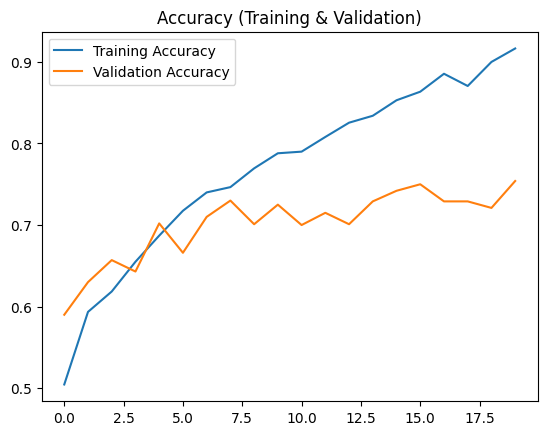

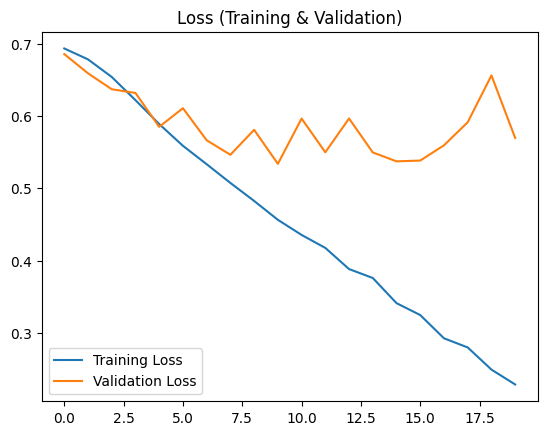

In [25]:
plot_loss_acc(history)

**NOTE:** The plot indicates that our model is overfitting

## **WITH Augmentation**

Create new model (for augmented data)

In [20]:
model_aug = create_model()

Create ImageDataGenerator WITH augmentation

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Train the model

In [22]:
history_aug = model_aug.fit(
  train_generator,
  steps_per_epoch=100,
  epochs=EPOCHS,
  validation_data=validation_generator,
  validation_steps=50,
  verbose=2)

Epoch 1/20
100/100 - 17s - loss: 0.6935 - accuracy: 0.5150 - val_loss: 0.7216 - val_accuracy: 0.5000 - 17s/epoch - 166ms/step
Epoch 2/20
100/100 - 16s - loss: 0.6898 - accuracy: 0.5485 - val_loss: 0.6800 - val_accuracy: 0.5860 - 16s/epoch - 156ms/step
Epoch 3/20
100/100 - 17s - loss: 0.6809 - accuracy: 0.5590 - val_loss: 0.6626 - val_accuracy: 0.5990 - 17s/epoch - 167ms/step
Epoch 4/20
100/100 - 16s - loss: 0.6747 - accuracy: 0.5735 - val_loss: 0.6489 - val_accuracy: 0.6120 - 16s/epoch - 159ms/step
Epoch 5/20
100/100 - 15s - loss: 0.6633 - accuracy: 0.5885 - val_loss: 0.6332 - val_accuracy: 0.6530 - 15s/epoch - 154ms/step
Epoch 6/20
100/100 - 16s - loss: 0.6508 - accuracy: 0.6170 - val_loss: 0.6170 - val_accuracy: 0.6460 - 16s/epoch - 160ms/step
Epoch 7/20
100/100 - 17s - loss: 0.6321 - accuracy: 0.6390 - val_loss: 0.6042 - val_accuracy: 0.6540 - 17s/epoch - 167ms/step
Epoch 8/20
100/100 - 16s - loss: 0.6305 - accuracy: 0.6255 - val_loss: 0.5946 - val_accuracy: 0.6970 - 16s/epoch - 161

Plot loss & accuracy from the model with augmented data

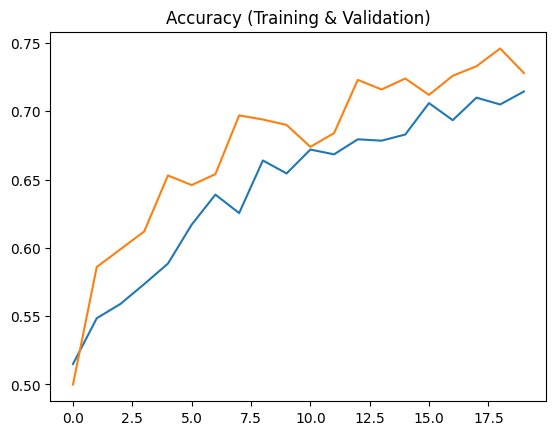

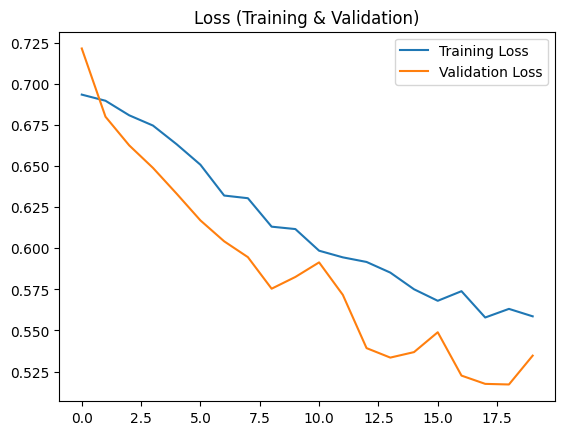

In [23]:
plot_loss_acc(history_aug)

**Result:** The model may not have the best accuracy, but it overcome the overfit